# **CHE-1148 ASSIGNMENT-4**

## **1. Data Quality**
### **Campaign response from transaction data**

From my previous assignment, among the random forest models, the annual features trained in random forest was the best model in performance.

Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Importing relevant files to create annual table

In [3]:
#importimg relevant files
retail_data = pd.read_csv("/Users/AyeshaPatnaik/Downloads/UofT/Sem2_Winter-23/CHE1148/Assignmnet-3/Retail_Data_Response-1.csv") 
annual_features = pd.read_excel("/Users/AyeshaPatnaik/Downloads/UofT/Sem1_Fall-22/CHE 1147/Assignment-3/annual features.xlsx")
annual_day_of_week_cnt = pd.read_excel("/Users/AyeshaPatnaik/Downloads/UofT/Sem1_Fall-22/CHE 1147/Assignment-3/annual_day_of_week_counts_pivot.xlsx")

In [4]:
#creating annual table by merging 
temp_table_1 = pd.merge(annual_features,annual_day_of_week_cnt, on = "customer_id")
annual_table = pd.merge(temp_table_1,retail_data, on = "customer_id")


In [5]:
annual_table #final required table containing annual data

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


In [7]:
annual_table.to_csv("annual_table.csv",index=False)

**Random Forest Modelling**


The best random forest model has max_depth of 4 and ccp_alpha of 0.006 that resulted in 75% accuracy and 57% recall on the annual data. So we'll proceed with the same data.

In [ ]:
X_annual = annual_table.drop(["response"],axis=1)


In [ ]:
X_annual = X_annual.drop(["customer_id"],axis=1)
X_annual #dataframe for input X annual data

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,...,1,1,1,0,0,0,0,0,0,1
1,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,...,0,3,0,0,2,0,0,0,0,1
2,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,...,0,1,1,0,0,0,0,1,0,0
3,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,...,2,0,2,0,0,0,0,1,0,0
4,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,...,1,1,2,0,0,0,0,0,0,0
6880,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,...,0,0,0,0,0,0,0,0,0,0
6881,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,...,0,1,1,0,0,0,0,0,0,0
6882,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,0,...,0,0,2,0,0,0,0,0,0,0


In [ ]:
y_annual=annual_table.loc[:,["response"]]
y_annual #datframe for output y annual data

,response
0,0
1,0
2,1
3,1
4,1
...,...
6879,0
6880,0
6881,0
6882,0


In [ ]:
#Splitting annual data into train and test with 2/3rd in test data and random state 1147 (to maintain consistency with previous assignment model)
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147) 

In [ ]:
print(X_train_annual.shape, X_test_annual.shape)

(2294, 75) (4590, 75)


We had established in earlier assignments that the annual data is imbalanced with higher amount of negatove response than posiitve response. Therefore, we add a "balanced" class weight to the model.

In [ ]:
#Training random forest model
estimator_annual_rf = RandomForestClassifier(random_state=0, max_depth = 4, ccp_alpha= 0.006,class_weight="balanced")
model_annual_rf = estimator_annual_rf.fit(X_train_annual, y_train_annual)

<ipython-input-10-db9525f184cd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_annual_rf = estimator_annual_rf.fit(X_train_annual, y_train_annual)


**Calculating Feature Importances**

In [ ]:
# Calculate feature importances
importances_annual_rf = model_annual_rf.feature_importances_
importances_annual_rf

array([0.01529507, 0.01760348, 0.04543614, 0.04141924, 0.00337408,
       0.00037149, 0.00314093, 0.02753357, 0.13208321, 0.00149079,
       0.00826955, 0.02094063, 0.03186963, 0.05078992, 0.0048053 ,
       0.01090231, 0.0165167 , 0.01883679, 0.02277695, 0.00502096,
       0.00135909, 0.00606982, 0.01654614, 0.05219146, 0.00580141,
       0.00733376, 0.01657061, 0.01758603, 0.01649431, 0.00164337,
       0.00886292, 0.00743963, 0.07030977, 0.15850006, 0.00547503,
       0.00291016, 0.01073096, 0.02243709, 0.0170377 , 0.00327568,
       0.        , 0.0004191 , 0.        , 0.00062381, 0.00091185,
       0.00080504, 0.        , 0.        , 0.00146911, 0.00252233,
       0.        , 0.00043099, 0.00233146, 0.00105951, 0.0008396 ,
       0.00264361, 0.00047114, 0.00604562, 0.00378441, 0.00203075,
       0.        , 0.00062407, 0.00161775, 0.00171516, 0.01375133,
       0.00740294, 0.00323771, 0.01145161, 0.00335397, 0.        ,
       0.00043131, 0.        , 0.        , 0.00083093, 0.00214

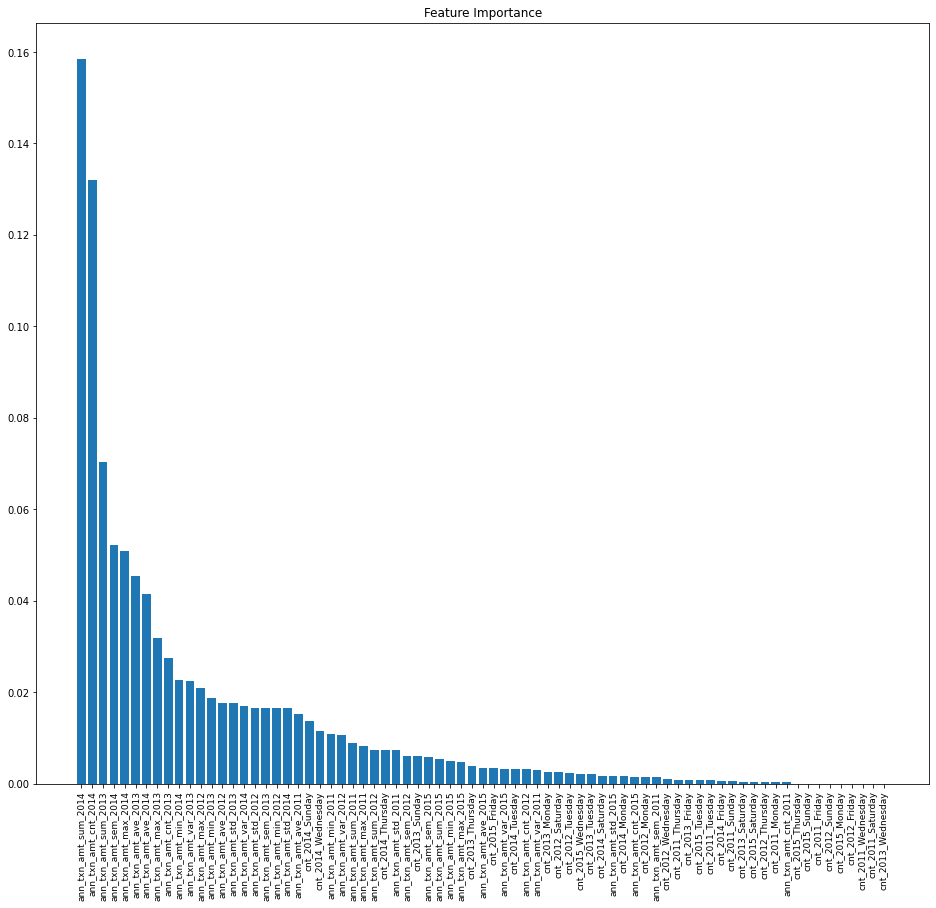

In [ ]:
# Sort feature importances in descending order
indices_annual_rf = np.argsort(importances_annual_rf)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_annual.columns[i] for i in indices_annual_rf]

# Create plot
plt.figure(figsize=(16,14))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_annual.shape[1]), importances_annual_rf[indices_annual_rf])
# Add feature names as x-axis labels
plt.xticks(range(X_annual.shape[1]), names, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=9)
# Show plot
plt.show()

**Calculating Completeness**

In [ ]:
# Calculating completeness

completeness_list =[] #empty list to store completenes for each column

x_df = pd.DataFrame(X_train_annual, columns=X_annual.columns)
for i in range (len(x_df.columns)):
  completeness_list.append((np.count_nonzero(x_df.iloc[:,i])/len(x_df.iloc[:,i]))*100)


Text(0.5, 1.0, 'Completenes-feature importance graph')

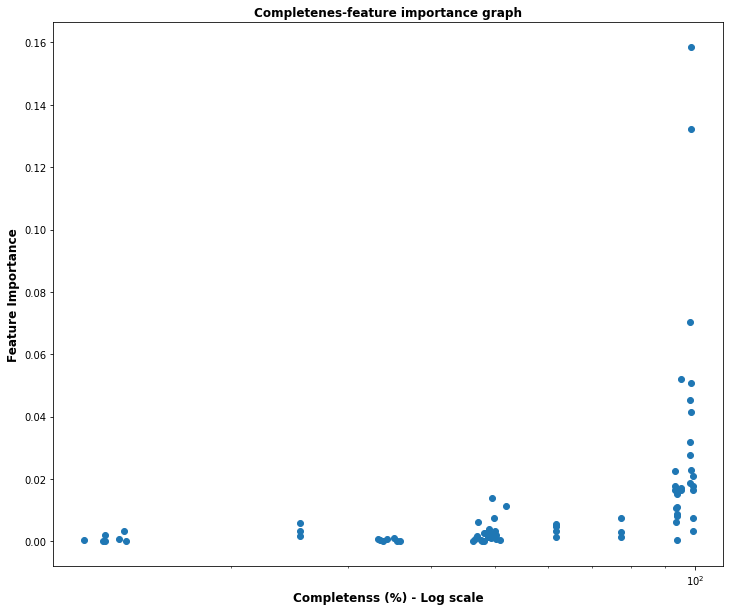

In [ ]:
#plotting feature importance vs completeness

plt.figure(figsize=(12,10))
plt.scatter(completeness_list, importances_annual_rf)
plt.xscale('log')
plt.ylabel("Feature Importance", fontsize = 12, fontweight='bold')
plt.xlabel("Completenss (%) - Log scale", fontsize = 12, fontweight='bold')
plt.title("Completenes-feature importance graph", fontweight='bold')

Interpretation of the feature importance vs completeness plot:

The plot essentially tells us the trade off between how much information each feature is capturing and how much each feature is contributing to the overall performance of the model. 

In the above graph, we see a strong correlation between completeness of the training dataset and feature importance for the Random Forest model. As the completeness of the features increases, the feature importance also increases from 0 to 0.16. Features with completeness close to 100 % (log scale) have highest importance. In short, we see significant amount of features that have high importance and completeness and they play a major predictor in the model.


Hence to further improve the model, I would redesign the features with more completeness by ensuring this from data collection stage. This in turn will increase the importance of the feature and hence contribute to high performance of the model.